# Lazy Playlist

My day job revolves around me finding and selecting music for media. As part of that, quite often I have to pull playlists together fetauring up to 30 tracks based off a musical reference provided by the client. This project aims to streamline that process by hashing audiofiles and using models to select references that are close to the original track.

First we start by importing our audio and converting our 24-bit stereo WAV files to 16-bit mono:

In [17]:
import soundfile
import wave

song = '/Users/christopherbacon/Downloads/NAKD002_01_Love Smiles.wav'
data, samplerate = soundfile.read(song)
test = soundfile.write('/Users/christopherbacon/Downloads/NAKD002_01_Love Smiles16.wav', data, samplerate, subtype='PCM_16')

Now we are going to load a useful audio library called librosa and proceed to convert our wav to mono. Below we can see our shape with two channels, ie stereo and after using our function mono.

In [18]:
import librosa

In [19]:
y, sr = librosa.load('/Users/christopherbacon/Downloads/NAKD002_01_Love Smiles16.wav', mono=False)
y.shape


(2, 2738669)

In [20]:
y_mono = librosa.to_mono(y)
y_mono.shape

(2738669,)

Now we can plot our spectrogram and also save as an image so that we can use the scikit image tool kit to plot the peaks in our spectrogram.

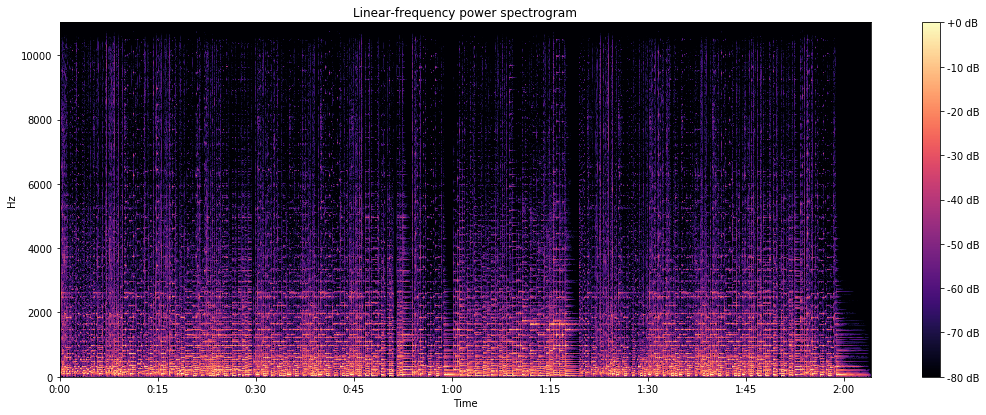

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import librosa.display

plt.figure(figsize=(40, 30))

D = librosa.amplitude_to_db(np.abs(librosa.stft(y_mono)), ref=np.max)
plt.subplot(4, 2, 1)
librosa.display.specshow(D, x_axis='time', y_axis='linear')

plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')
plt.xlabel('Time')

plt.savefig('Love Smiles16.png')
plt.savefig('Love Smiles16.pdf')

plt.savefig('Love Smiles16.png', bbox_inches='tight')

Now that we have pulled our spectrograph we can apply our peak_local_max function to plot the peaks.

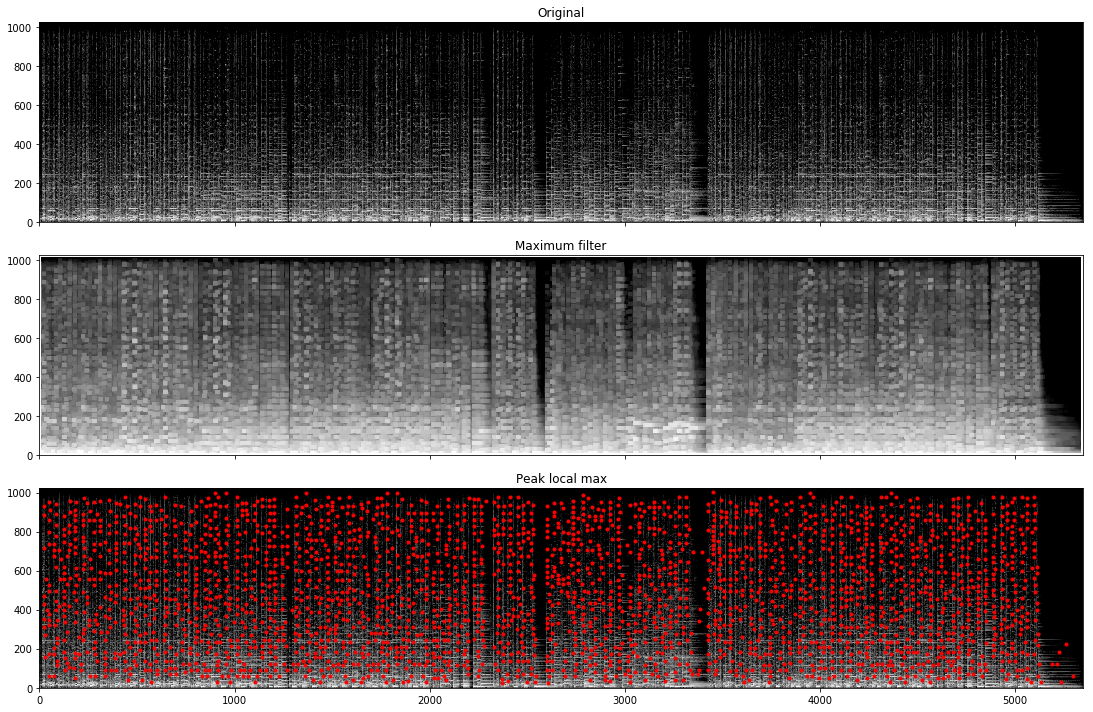

In [22]:
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max
from skimage import data, img_as_float

im = img_as_float(D)

# image_max is the dilation of im with a 20*20 structuring element
# It is used within peak_local_max function
image_max = ndi.maximum_filter(im, size=20, mode='constant')

# Comparison between image_max and im to find the coordinates of local maxima
coordinates = peak_local_max(im, min_distance=20)

# display results
fig, axes = plt.subplots(3, 1, figsize=(20, 10), sharex=True, sharey=True)
ax = axes.ravel()
ax[0].imshow(im, cmap=plt.cm.gray, origin='lower')
ax[0].set_title('Original')

ax[1].imshow(image_max, cmap=plt.cm.gray, origin='lower')
ax[1].set_title('Maximum filter')

ax[2].imshow(im, cmap=plt.cm.gray, origin='lower')
ax[2].autoscale(False)
ax[2].plot(coordinates[:, 1], coordinates[:, 0], 'r.')
ax[2].set_title('Peak local max')

fig.tight_layout()

plt.show()

Our next step is to turn this dotted spectrogram into hash table that we can use as a fingerprint to compare to other music.

In [23]:
coordinates.shape, coordinates.size

((2660, 2), 5320)

In [24]:
coordinates.mean()

1544.3862781954888

Now if we were going to follow Shazam's lead we would create a hash table, this would make the process of audio recognigiton more efficient and take a chunk of our song. 

Acknowledgments:
    
https://willdrevo.com/fingerprinting-and-audio-recognition-with-python/

https://pythontic.com/visualization/signals/spectrogram

https://realpython.com/playing-and-recording-sound-python/

https://networkedlifeq21.fandom.com/wiki/How_does_Shazam_Uniquely_Identify_A_Track%3F
    
   